# JSON and APIs

_September 22, 2020_

Agenda today:
- Introduction to API and Remote Server Model 
- Getting data through an API: Case study with YELP API

In [94]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sqlite3
conn = sqlite3.connect('burger_joints.db') 
c = conn.cursor()

## Part I. APIs and Remote Server Model
API stands for Application Programming Interface. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.

<img src='status-code.png' width = 500>

## Part II. Getting Data Through APIs

The `get()` method send a request to YELP's API, and stored information in a variable called `request`. Next, let's see if it's successful. 

#### YELP API
Sometimes you need _authentication_ to get data from a service in additional to just sending a `GET()` request. Yelp API is a perfect example. 

You will need to go to the YELP's developer's [website](https://www.yelp.com/developers/v3/manage_app) and request for a client ID and API key, which function like a key into a house of data. 

<img src='yelp.png' width = 500>

In [95]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [96]:
# check the status code
response.status_code

# what happened here?

400

In [97]:
# now we are ready to get our data 

# usually, services would limit you to a certain amount of API calls. This varies from service
# to service, so you have to watch out to it 

MY_API_KEY = "NxtMiHhoo60686e4ETOSC5oiZuGGh75pCHk_I-o4aGeYh09Ad2k8zZvKgtcvqpwP_Z5IqsnoMxQno0-3sRu47D5V1uVP9uJ1UnlJeE-qfqbLokxZ2mbeWbj-8w5qX3Yx"


term = 'burgers'
location = 'Brooklyn'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [98]:
# examine the response object

print(response)


<Response [200]>


In [99]:
# how are we going to parse the response.text object?

print(response.text)

{"businesses": [{"id": "dkAj-3gmkvdA4XkJmw6hCw", "alias": "juanchis-burger-brooklyn", "name": "Juanchi's Burger", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/ZgbWUBZhsVm5RrrprkmAfQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/juanchis-burger-brooklyn?adjust_creative=kCWh97FC3e0Y7Emck3mGaw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kCWh97FC3e0Y7Emck3mGaw", "review_count": 449, "categories": [{"alias": "gastropubs", "title": "Gastropubs"}, {"alias": "burgers", "title": "Burgers"}], "rating": 4.5, "coordinates": {"latitude": 40.713003, "longitude": -73.958863}, "transactions": ["delivery", "pickup"], "price": "$$", "location": {"address1": "225 S 1st St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11211", "country": "US", "state": "NY", "display_address": ["225 S 1st St", "Brooklyn, NY 11211"]}, "phone": "+19292950147", "display_phone": "(929) 295-0147", "distance": 6945.73380896072}, {"id": "-0bdnX762vdTb9lI00et

In [100]:
# working with JSON

burgers = response.text
burgers = json.loads(burgers)

In [101]:
# cleaning and exploring the data
for key in burgers.keys():
    print(key)

businesses
total
region


In [102]:
burgers["region"]

{'center': {'longitude': -73.93936157226562, 'latitude': 40.652330148320374}}

In [103]:
burgers['businesses'][0]

{'id': 'dkAj-3gmkvdA4XkJmw6hCw',
 'alias': 'juanchis-burger-brooklyn',
 'name': "Juanchi's Burger",
 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/ZgbWUBZhsVm5RrrprkmAfQ/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/juanchis-burger-brooklyn?adjust_creative=kCWh97FC3e0Y7Emck3mGaw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kCWh97FC3e0Y7Emck3mGaw',
 'review_count': 449,
 'categories': [{'alias': 'gastropubs', 'title': 'Gastropubs'},
  {'alias': 'burgers', 'title': 'Burgers'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.713003, 'longitude': -73.958863},
 'transactions': ['delivery', 'pickup'],
 'price': '$$',
 'location': {'address1': '225 S 1st St',
  'address2': None,
  'address3': '',
  'city': 'Brooklyn',
  'zip_code': '11211',
  'country': 'US',
  'state': 'NY',
  'display_address': ['225 S 1st St', 'Brooklyn, NY 11211']},
 'phone': '+19292950147',
 'display_phone': '(929) 295-0147',
 'distance': 6945.73380896072}

In [104]:
burgers_df.head(1)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,$
0,dkAj-3gmkvdA4XkJmw6hCw,juanchis-burger-brooklyn,Juanchi's Burger,https://s3-media4.fl.yelpcdn.com/bphoto/ZgbWUB...,False,https://www.yelp.com/biz/juanchis-burger-brook...,449,"[{'alias': 'gastropubs', 'title': 'Gastropubs'...",4.5,"{'latitude': 40.713003, 'longitude': -73.958863}","[pickup, delivery]",$$,"{'address1': '225 S 1st St', 'address2': None,...",+19292950147,(929) 295-0147,6945.733809,2


In [105]:
# turn the relevant dataset into a dataframe

burgers_df = pd.DataFrame.from_dict(burgers["businesses"])
burgers_df.dropna(inplace = True)
burgers_df.isnull().sum()

id               0
alias            0
name             0
image_url        0
is_closed        0
url              0
review_count     0
categories       0
rating           0
coordinates      0
transactions     0
price            0
location         0
phone            0
display_phone    0
distance         0
dtype: int64

In [106]:
# you can do some analysis and visualization from here on! 

# visualize the review count - what's the appropriate plot?
burgers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 49
Data columns (total 16 columns):
id               37 non-null object
alias            37 non-null object
name             37 non-null object
image_url        37 non-null object
is_closed        37 non-null bool
url              37 non-null object
review_count     37 non-null int64
categories       37 non-null object
rating           37 non-null float64
coordinates      37 non-null object
transactions     37 non-null object
price            37 non-null object
location         37 non-null object
phone            37 non-null object
display_phone    37 non-null object
distance         37 non-null float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 4.7+ KB


In [107]:
# query the name of the burgers place with the highest review
burgers_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [108]:
review_300=burgers_df.loc[burgers_df["review_count"]> 300, "price"]


In [109]:
review_300

0      $$
1      $$
2      $$
16     $$
18     $$
19    $$$
20     $$
21     $$
24     $$
25     $$
26     $$
34     $$
35     $$
39     $$
40     $$
42     $$
44     $$
46     $$
Name: price, dtype: object

In [110]:
len(review_300)

18

In [111]:
# migrate the cleaned data into a sql db

In [112]:
# can you do some other queries using sql/pandas?

#### Resources
- [Getting Data from Reddit API](https://www.storybench.org/how-to-scrape-reddit-with-python/)
- [Twitch API](https://dev.twitch.tv/docs)

In [113]:
burgers_df["$"] = burgers_df.price.map(lambda x: len(x))

In [114]:
burgers_df= burgers_df.sort_values(by = "rating", ascending = False)
# burgers_df.groupby(burgers_df["rating"])["review_count"].mean()

In [115]:
burgers_df.sort_values(by = "$", ascending = False)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,$
19,NDIrifAl6K-RrnZ2D3ZGbw,emily-brooklyn-2,Emily,https://s3-media2.fl.yelpcdn.com/bphoto/8yYb5q...,False,https://www.yelp.com/biz/emily-brooklyn-2?adju...,788,"[{'alias': 'tradamerican', 'title': 'American ...",4.0,"{'latitude': 40.68351, 'longitude': -73.96643}","[pickup, delivery]",$$$,"{'address1': '919 Fulton St', 'address2': '', ...",+13478449588,(347) 844-9588,4151.187882,3
0,dkAj-3gmkvdA4XkJmw6hCw,juanchis-burger-brooklyn,Juanchi's Burger,https://s3-media4.fl.yelpcdn.com/bphoto/ZgbWUB...,False,https://www.yelp.com/biz/juanchis-burger-brook...,449,"[{'alias': 'gastropubs', 'title': 'Gastropubs'...",4.5,"{'latitude': 40.713003, 'longitude': -73.958863}","[delivery, pickup]",$$,"{'address1': '225 S 1st St', 'address2': None,...",+19292950147,(929) 295-0147,6945.733809,2
42,D2qV8sDdHEFlHbVz7VSHRQ,black-tap-soho-new-york-3,Black Tap - Soho,https://s3-media4.fl.yelpcdn.com/bphoto/3Jm6Ri...,False,https://www.yelp.com/biz/black-tap-soho-new-yo...,1182,"[{'alias': 'tradamerican', 'title': 'American ...",3.5,"{'latitude': 40.723794, 'longitude': -74.004193}","[pickup, delivery]",$$,"{'address1': '529 Broome St', 'address2': '', ...",+19176393089,(917) 639-3089,9644.994494,2
4,wYgp-defqwJPhjC6Y_WKWg,burgerfi-brooklyn-2,BurgerFi,https://s3-media2.fl.yelpcdn.com/bphoto/U56T0L...,False,https://www.yelp.com/biz/burgerfi-brooklyn-2?a...,299,"[{'alias': 'hotdog', 'title': 'Hot Dogs'}, {'a...",4.0,"{'latitude': 40.61883, 'longitude': -74.02131}","[pickup, delivery]",$$,"{'address1': '719 86th St', 'address2': '', 'a...",+17188360836,(718) 836-0836,7856.266094,2
18,m86CNmYThtzzWB3nPnrhbg,emily-west-village-new-york,Emily - West Village,https://s3-media2.fl.yelpcdn.com/bphoto/KpZUiN...,False,https://www.yelp.com/biz/emily-west-village-ne...,651,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 40.729330068469, 'longitude': -74...","[pickup, delivery]",$$,"{'address1': '35 Downing St', 'address2': '', ...",+19179356434,(917) 935-6434,10144.462798,2
12,Q39xJvqJaM1xgDka8bQ80w,black-iron-burger-brooklyn,Black Iron Burger,https://s3-media2.fl.yelpcdn.com/bphoto/CP5dTh...,False,https://www.yelp.com/biz/black-iron-burger-bro...,90,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",4.0,"{'latitude': 40.680368, 'longitude': -73.975156}","[pickup, delivery]",$$,"{'address1': '234 Flatbush Ave', 'address2': '...",+19294196888,(929) 419-6888,4338.668889,2
24,QkHTyN7gIlv8BROf3e3dKg,smashburger-brooklyn-3,Smashburger,https://s3-media3.fl.yelpcdn.com/bphoto/Tx50ao...,False,https://www.yelp.com/biz/smashburger-brooklyn-...,341,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.5,"{'latitude': 40.68968, 'longitude': -73.97994}","[pickup, delivery]",$$,"{'address1': '74 Dekalb Ave', 'address2': '', ...",+17182221101,(718) 222-1101,5384.221468,2
46,HDDBpOKpKqRza-IhiE4CTw,bareburger-brooklyn-3,Bareburger,https://s3-media1.fl.yelpcdn.com/bphoto/Vwuff0...,False,https://www.yelp.com/biz/bareburger-brooklyn-3...,372,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.5,"{'latitude': 40.68921, 'longitude': -73.99245}","[pickup, delivery]",$$,"{'address1': '149 Court St', 'address2': '', '...",+13475296673,(347) 529-6673,6065.420721,2
8,GTYn-iP81HKVKl6FGT0_Cw,smashburger-brooklyn-4,Smashburger,https://s3-media3.fl.yelpcdn.com/bphoto/k27--r...,False,https://www.yelp.com/biz/smashburger-brooklyn-...,195,"[{'alias': 'burgers', 'title': 'Burgers'}]",3.5,"{'latitude': 40.653523, 'longitude': -73.871513}","[pickup, delivery]",$$,"{'address1': '528 Gateway Dr', 'address2': Non...",+17182356900,(718) 235-6900,5725.251777,2
45,8FvdmDeaE74iYtslwNPITg,lot-2-brooklyn-2,Lot 2,https://s3-media3.fl.yelpcdn.com/bphoto/IekFBe...,False,https://www.yelp.com/biz/lot-2-brooklyn-2?adju...,259,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 40.6605911254883, 'longitude': -7...","[pickup, delivery]",$$,

In [116]:
grouped_by_price_rating_avg = burgers_df.groupby(burgers_df["$"])["rating"].mean()
grouped_by_price_rating_avg

$
1    3.500000
2    3.941176
3    4.000000
Name: rating, dtype: float64

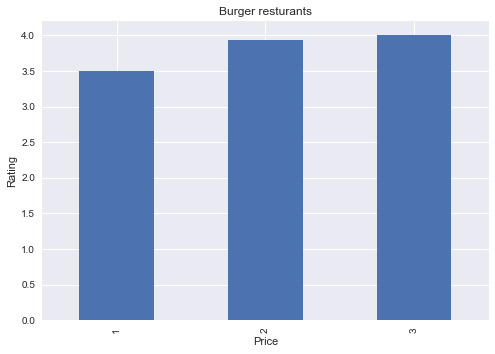

In [117]:
grouped_by_price_rating_avg.plot(kind = "bar", title = "Burger resturants",)
plt.xlabel("Price")
plt.ylabel("Rating");


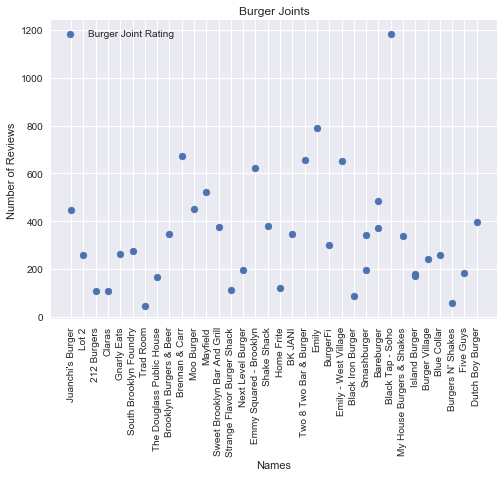

In [150]:
plt.scatter(burgers_df["name"], burgers_df["review_count"], label = "Burger Joint Rating",)
plt.title("Burger Joints")
plt.legend(loc = 2)
plt.xticks(rotation =  90)
plt.xlabel("Names")
plt.ylabel("Number of Reviews");